## Apply the model

- Load the model(s) which have been created and trained
- Load data pertaining to the upcoming round of matches
- Predict the game results

In [12]:
import joblib
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

prediction_labels = ['','no-score draw','score draw','home win','away win']

In [22]:
# load the pre-trained models

football_classifier_mlp = joblib.load('football_classifier_mlp.pkl')
football_classifier_knn = joblib.load('football_classifier_knn.pkl')
football_classifier_ada = joblib.load('football_classifier_ada.pkl')
classifiers = {
    "mlp": football_classifier_mlp,
    "knn": football_classifier_knn,
    "ada": football_classifier_ada
}

In [14]:
# load the cleaned data which contains the features for predicting the next round of matches
cleaned_results = pd.read_csv('cleaned_results.csv')
cleaned_results

,league,home_team,away_team,home_elo,away_elo,home_goals_f,home_goals_a,away_goals_f,away_goals_a,home_streak,away_streak
0,premier_league,Newcastle,Liverpool,69.0,89.0,23,26,40,15,2,0
1,premier_league,Aston Villa,Norwich,63.0,62.0,24,25,10,35,-4,0
2,premier_league,Southampton,Crystal Palace,81.0,74.0,21,20,18,23,0,0
3,premier_league,Tottenham,Leicester,89.0,80.0,31,18,20,30,0,0
4,premier_league,Watford,Burnley,71.0,69.0,15,39,13,25,-3,0
...,...,...,...,...,...,...,...,...,...,...,...
114,eredivisie,For Sittard,Willem II,45.0,61.0,17,26,11,32,0,-2
115,eredivisie,Utrecht,PSV Eindhoven,77.0,88.0,29,18,31,16,0,0
116,eredivisie,Heracles,Vitesse,72.0,76.0,20,17,18,19,0,0
117,eredivisie,Zwolle,Feyenoord,71.0,84.0,11,17,33,16,0,2


In [23]:
# use the cleaned data to predict the next round of matches
features = cleaned_results.to_numpy()[:,3:].astype(float)
teams = cleaned_results.to_numpy()[:, :3]
predictions = {}
for c in classifiers:
    predictions[c] = classifiers[c].predict(features)

In [24]:
outputs = {}
for c in classifiers:
    print('\n\nClassifier:', c)
    print('************************')
    league_name = ''
    prediction_list = []
    for result, home_away in zip(predictions[c], teams):
        if league_name != home_away[0]:
            league_name = home_away[0]
            print(f'\n{league_name}')
            print('-----------------')
        print('{} vs {}: {}'.format(home_away[1], home_away[2], prediction_labels[result]))
        prediction_list.append([home_away[0], home_away[1], home_away[2], prediction_labels[result]])

    outputs[c] = pd.DataFrame(prediction_list, columns=['league', 'home', 'away', 'prediction'])
    outputs[c].to_csv(f'predictions_{c}_{datetime.date.today().strftime("%d-%m-%Y")}.csv', index=False)



Classifier: mlp
************************

premier_league
-----------------
Newcastle vs Liverpool: home win
Aston Villa vs Norwich: away win
Southampton vs Crystal Palace: home win
Tottenham vs Leicester: home win
Watford vs Burnley: away win
Wolves vs Brighton: away win
Leeds vs Man City: home win
Everton vs Chelsea: home win
West Ham vs Arsenal: home win
Man United vs Brentford: home win

championship
-----------------
Huddersfield vs Barnsley: no-score draw
Luton vs Blackpool: score draw
Bournemouth vs Fulham: home win
Birmingham vs Millwall: away win
Derby vs Bristol City: home win
Hull vs Reading: home win
Peterboro vs Nott'm Forest: home win
Sheffield United vs Cardiff: home win
Stoke vs QPR: home win
Swansea vs Middlesbrough: home win
West Brom vs Coventry: home win
Preston vs Blackburn: no-score draw

bundesliga
-----------------
Wolfsburg vs Mainz: home win
Greuther Furth vs Leverkusen: home win
RB Leipzig vs Union Berlin: no-score draw
Freiburg vs Bochum: no-score draw
Ein 

mlp prediction
1             0.151261
2             0.008403
3             0.647059
4             0.193277
dtype: float64
knn prediction
3             0.638655
4             0.361345
dtype: float64
ada prediction
3             0.084034
4             0.915966
dtype: float64


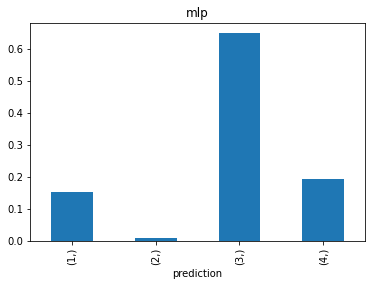

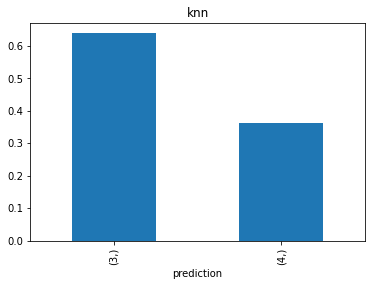

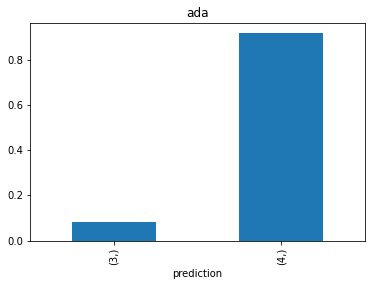

In [25]:
for c in classifiers:
    results = outputs[c][['league','prediction']]
    results = results.groupby('league')['prediction'].value_counts().unstack().fillna(0).astype(int)
    results.reindex()
    results_count = outputs[c][['prediction']].copy()
    results_count.replace({'home win':3, 'away win': 4, 'score draw': 2, 'no-score draw': 1}, inplace=True)
    results_count['prediction'] = results_count['prediction'].astype(int)
    plt.figure()
    results_count.value_counts(normalize=True).sort_index().plot(kind='bar')  
    print(c, results_count.value_counts(normalize=True).sort_index())
    plt.title(c) 

<AxesSubplot:xlabel='prediction'>

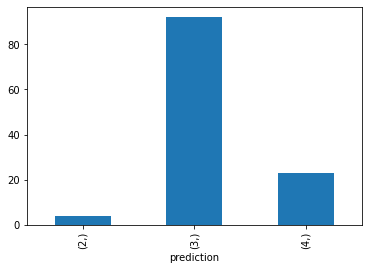

In [8]:
results_mlp = outputs['mlp'][['prediction']].copy()
results_mlp.replace({'home win':3, 'away win': 4, 'score draw': 2, 'no-score draw': 1}, inplace=True)
results_mlp['prediction'] = results_mlp['prediction'].astype(int)
results_mlp.value_counts().sort_index().plot(kind='bar')

In [9]:
liv_manu = [91, 92, 40, 7, 24, 24, 0, 0]
manc_bri = [94, 62, 42, 12, 19, 17, 0, 2]

In [11]:
classifiers['mlp'].predict([manc_bri])

array([4])